<a href="https://colab.research.google.com/github/rachayita-barmon/cse423/blob/main/423_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q lucid>=0.2.3

In [ ]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))

# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR))
#print(gl.glGetString(gl.GL_EXTENSIONS))

In [ ]:
# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)


def draw_points(x, y):
    gl.glPointSize(5)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(x, y)
    gl.glEnd()


def iterate():
    gl.glViewport(0, 0, 800, 800)
    gl.glMatrixMode(gl.GL_PROJECTION)
    gl.glLoadIdentity()
    gl.glOrtho(0.0, 800, 0.0, 800, 0.0, 1.0)
    gl.glMatrixMode(gl.GL_MODELVIEW)
    gl.glLoadIdentity()


def write_pixel(x, y, zone):
    x, y = convert_to_zone_original(x, y, zone)
    draw_points(x, y)


def draw_line(x1, y1, x2, y2):
    zone = find_zone(x1, y1, x2, y2)
    x1, y1 = convert_zone_to_zero(x1, y1, zone)
    x2, y2 = convert_zone_to_zero(x2, y2, zone)
    dx = x2 - x1
    dy = y2 - y1
    d = 2 * dy - dx
    incE = 2 * dy
    incNE = 2 * (dy - dx)
    y = y1
    x = x1
    while x <= x2:
        write_pixel(x, y, zone)
        if d > 0:
            d = d + incNE
            y = y + 1
        else:
            d = d + incE
        x = x + 1



def find_zone(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1

    if abs(dx) >= abs(dy):
        if dx >= 0 and dy > 0:
            zone = 0
        elif dx <= 0 < dy:
            zone = 3
        elif dx <= 0 and dy < 0:
            zone = 4
        else:
            zone = 7
    else:
        if dx >= 0 and dy > 0:
            zone = 1
        elif dx <= 0 < dy:
            zone = 2
        elif dx <= 0 and dy < 0:
            zone = 5
        else:
            zone = 6

    return zone

def convert_zone_to_zero(x, y, zone):
    if zone == 0:
        return x, y
    elif zone == 1:
        return y, x
    elif zone == 2:
        return y, -x
    elif zone == 3:
        return -x, y
    elif zone == 4:
        return -x, -y
    elif zone == 5:
        return -y, -x
    elif zone == 6:
        return -y, x
    else:
        return x, -y


def convert_to_zone_original(x, y, zone):
    if zone == 2:
        return -y, x
    elif zone == 6:
        return y, -x
    else:
        return convert_zone_to_zero(x, y, zone)


def draw_circle(x_cordinate, y_cordinate, r):
    x = 0
    y = r
    d = 1 - r
    write_pixel2(x, y, x_cordinate, + y_cordinate)
    while x < y:
        inc_E = 2 * x + 3
        inc_SE = 2 * x - 2 * y + 5
        if d < 0:
            d += inc_E
            x = x + 1
        else:
            d += inc_SE
            y = y - 1
            x = x + 1

        write_pixel2(x, y, x_cordinate, y_cordinate)


def write_pixel2(x, y, x_cordinate, y_cordinate):
    draw_points(x_cordinate + x, y_cordinate + y)
    draw_line(x_cordinate, y_cordinate, x_cordinate + x, y_cordinate + y)
    draw_points(x_cordinate + y, y_cordinate + x)
    draw_line(x_cordinate, y_cordinate, x_cordinate + y, y_cordinate + x)
    draw_points(x_cordinate + y, y_cordinate - x)
    draw_line(x_cordinate, y_cordinate, x_cordinate + y, y_cordinate - x)
    draw_points(x_cordinate + x, y_cordinate - y)
    draw_line(x_cordinate, y_cordinate,x_cordinate + x, y_cordinate - y)
    draw_points(x_cordinate - x, y_cordinate - y)
    draw_line(x_cordinate, y_cordinate, x_cordinate - x,y_cordinate - y)
    draw_points(x_cordinate - y, y_cordinate - x)
    draw_line(x_cordinate, y_cordinate, x_cordinate - y, y_cordinate - x)
    draw_points(x_cordinate - y,y_cordinate + x)
    draw_line(x_cordinate,y_cordinate, x_cordinate - y, y_cordinate + x)
    draw_points(x_cordinate - x, y_cordinate + y)
    draw_line(x_cordinate, y_cordinate, x_cordinate - x, y_cordinate + y)


gl.glClear(gl.GL_COLOR_BUFFER_BIT | gl.GL_DEPTH_BUFFER_BIT)
gl.glLoadIdentity()
iterate()
gl.glColor3f(1, 1, 0)


#background
field = 0
while field <= 800:
    gl.glColor3f(0.3, 0.6, 0.1) #0,5,0
    draw_line(field, 0, field, 200)
    field = field+ 1
sky = 0
while sky <= 800:
    gl.glColor3f(0.3,0.6,1) #0,1,1
    draw_line(sky, 200, sky, 800)
    sky = sky+ 1
#hill
def hill(q,w,e):
  gl.glColor3f(0.1,0.3,0) #0,0.4,0.1

  gl.glBegin(gl.GL_TRIANGLES)
  gl.glVertex2f(q,350) #a
  gl.glVertex2f(w,190)#b
  gl.glVertex2f(e,190)#c
  gl.glEnd()

hill(100,1,200)
hill(300,200,400)
hill(500,400,600)
hill(700,600,800)

#Human
gl.glColor3f(0, 0, 0)
draw_circle(150, 300, 15)#head
draw_line(150, 200, 150, 300)#body
draw_line(80,100,150,200)#leftleg
draw_line(220,100,150,200)#rightleg
draw_line(100,220,150,250)#lefthand
draw_line(200,220,150,250)#righthand



def aquarium():
  gl.glColor3f(0,0.3,0.4)
  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(800,150) #1up
  gl.glVertex2f(450,150) #2up
  gl.glVertex2f(450,0) #2Low
  gl.glVertex2f(800,0) #1Low
  gl.glEnd()

aquarium()

catch =int(input("Enter the speed of your fish hook: "))

def fish_tail():

    m = np.array([[700],
                  [50]])

    n = np.array([[750],
                  [70]])

    o = np.array([[750],
                  [30]])


    u = np.array([[-50],
                  [-20]])

    e = np.array([[-150],
                  [-60]])

    v = np.array([[0],
                  [0]])

    w = np.array([[-70],
                  [20]])

    m1 =np.add(m,u)
    n1 =np.add(n,e)
    o1 =np.add(o,u)

    m111 =np.add(m1,w)
    n111 =np.add(n1,w)
    o111 =np.add(o1,w)

    m11 =np.add(m,v)
    n11 =np.add(n,v)
    o11 =np.add(o,v)


    if (catch>5):
      gl.glColor3f(0.9,0.3,0.1)
      gl.glPointSize(4)
      gl.glBegin(gl.GL_TRIANGLES)
      gl.glVertex2f(m111[0][0],m111[1][0])
      gl.glVertex2f(n111[0][0],n111[1][0])
      gl.glVertex2f(o111[0][0],o111[1][0])
      gl.glEnd()


    else:
      gl.glColor3f(0.9,0.3,0.1)
      gl.glPointSize(4)
      gl.glBegin(gl.GL_TRIANGLES)
      gl.glVertex2f(m11[0][0],m11[1][0])
      gl.glVertex2f(n11[0][0],n11[1][0])
      gl.glVertex2f(o11[0][0],o11[1][0])
      gl.glEnd()




def fish_body():
    a = np.array([[650],
                  [70]])

    b = np.array([[600],
                  [50]])

    c = np.array([[650],
                  [30]])

    d = np.array([[700],
                  [50]])

    x = np.array([[-70],
                  [20]])

    y = np.array([[0],
                  [0]])

    a1 =np.add(a,x)
    b1 =np.add(b,x)
    c1 =np.add(c,x)
    d1 =np.add(d,x)

    a11 =np.add(a,y)
    b11 =np.add(b,y)
    c11 =np.add(c,y)
    d11 =np.add(d,y)

    if (catch>5):
      gl.glColor3f(0.9,0.3,0.1)
      gl.glPointSize(4)
      gl.glBegin(gl.GL_QUADS)
      gl.glVertex2f(a1[0][0],a1[1][0])
      gl.glVertex2f(b1[0][0],b1[1][0])
      gl.glVertex2f(c1[0][0],c1[1][0])
      gl.glVertex2f(d1[0][0],d1[1][0])
      gl.glEnd()


    else:
      gl.glColor3f(0.9,0.3,0.1)
      gl.glPointSize(4)
      gl.glBegin(gl.GL_QUADS)
      gl.glVertex2f(a11[0][0],a11[1][0])
      gl.glVertex2f(b11[0][0],b11[1][0])
      gl.glVertex2f(c11[0][0],c11[1][0])
      gl.glVertex2f(d11[0][0],d11[1][0])
      gl.glEnd()


fish_body()
fish_tail()

gl.glColor3f(0.5, 0.2, 0)
draw_line(100,220,580,200)#long_borshi
gl.glColor3f(0.5, 0.2, 0)
draw_line(580,200,580,100)#shuta

#drawing clouds
gl.glColor3f(1, 1, 1)
draw_circle(300, 500, 50)
draw_circle(330, 500, 35)
draw_circle(250, 500, 25)
gl.glColor3f(1, 1, 1)
draw_circle(400, 500, 40)
draw_circle(430, 500, 35)
draw_circle(350, 500, 25)
draw_circle(430, 500, 25)



Enter the speed of your fish hook: 7


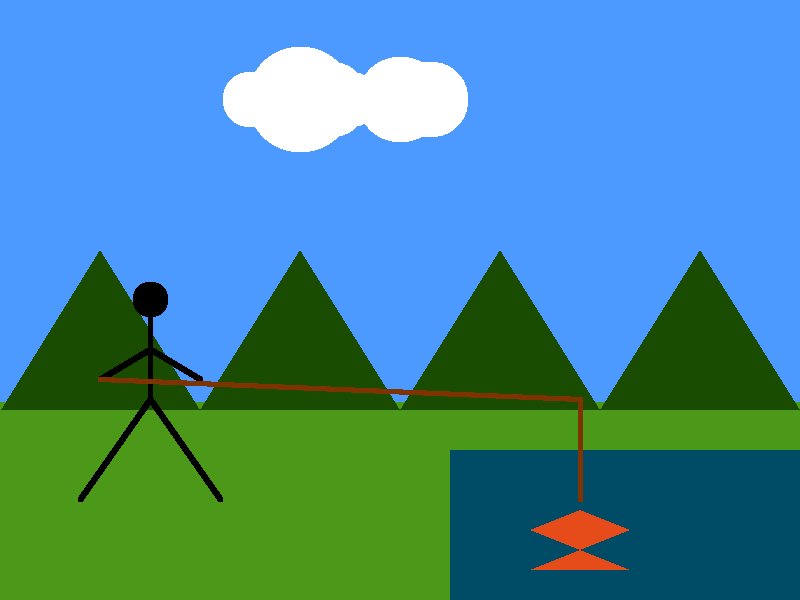

In [ ]:
from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))